# Logistic Regression 

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

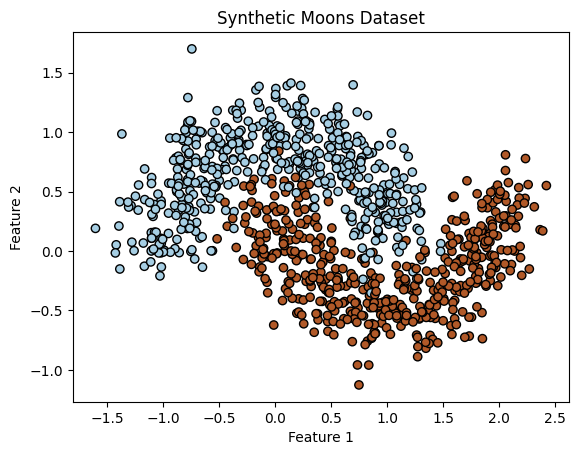

In [3]:
# Generate a synthetic dataset
x, y = make_moons(n_samples=1000, noise=0.2, random_state=1)

# Plot the dataset
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Moons Dataset')
plt.show()


In [14]:
# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [15]:
# Convert the data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [16]:
# Define the neural network model
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # Linear function 1: input_dim --> hidden_dim
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: hidden_dim --> hidden_dim
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: hidden_dim --> hidden_dim
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout): hidden_dim --> output_dim
        self.fc4 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        
        # Linear function 3
        out = self.fc3(out)
        # Non-linearity 3
        out = self.elu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

In [17]:
# Instantiate the model, define the loss function and the optimizer
input_dim = x_train.shape[1]
hidden_dim = 150
output_dim = 2
model = ANNModel(input_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [18]:
# Training loop
num_epochs = 100
loss_list = []

for epoch in range(num_epochs):
    model.train()
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_train_tensor)
    
    # Compute and print loss
    loss = criterion(y_pred, y_train_tensor)
    
    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Store loss value for plotting
    loss_list.append(loss.item())
    
    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss.item():.4f}')

Epoch 10, Loss: 0.3131
Epoch 20, Loss: 0.1706
Epoch 30, Loss: 0.0970
Epoch 40, Loss: 0.0777
Epoch 50, Loss: 0.0743
Epoch 60, Loss: 0.0713
Epoch 70, Loss: 0.0691
Epoch 80, Loss: 0.0677
Epoch 90, Loss: 0.0665
Epoch 100, Loss: 0.0655


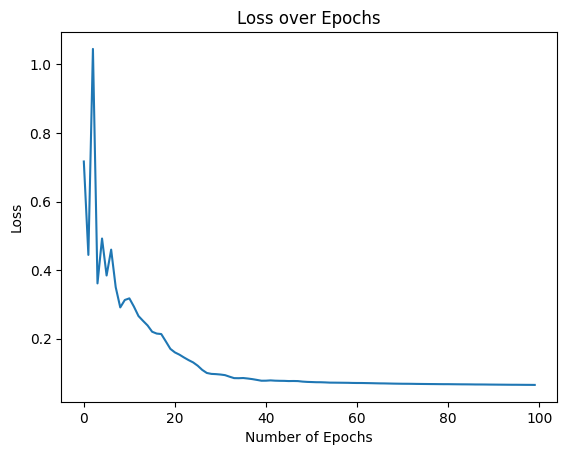

In [19]:
# Plot the loss over the epochs
plt.plot(range(num_epochs), loss_list)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.show()

In [20]:
# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    y_test_pred = model(x_test_tensor)
    test_loss = criterion(y_test_pred, y_test_tensor).item()
    _, predicted = torch.max(y_test_pred, 1)
    accuracy = (predicted == y_test_tensor).float().mean().item()

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}')

Test Loss: 0.1482, Test Accuracy: 0.9600


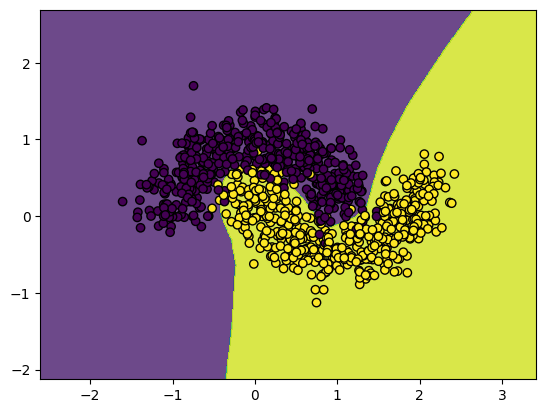

In [21]:
# Plot the decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    with torch.no_grad():
        Z = model(grid_tensor)
        _, Z = torch.max(Z, 1)
        Z = Z.numpy().reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()

plot_decision_boundary(model, x, y)